# Appendix: Analytical Solutions
This notebook provides analytical solutions for the p-n junction to support numerical results (PBL Level 3).

Using poisson_solver from: c:\Users\earme\OneDrive\Desktop\pn-junction-modeling\code\poisson_solver.py


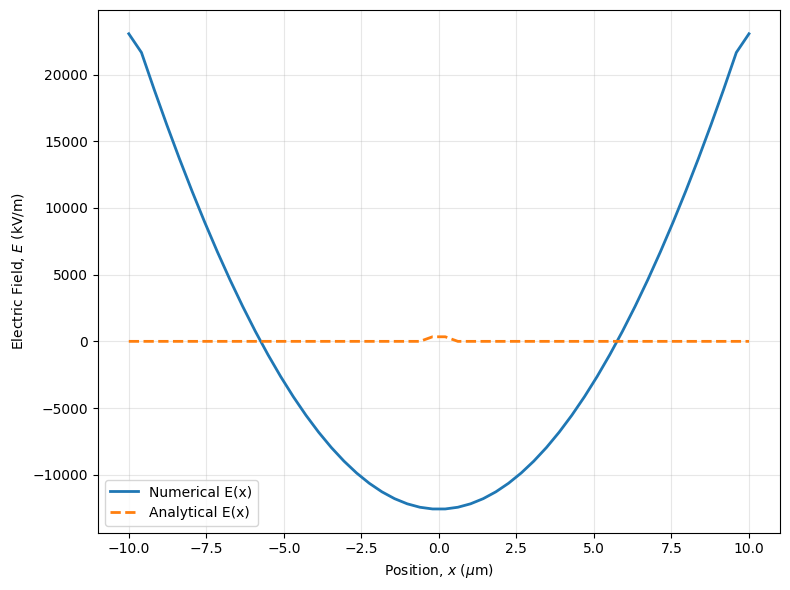

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ["PYTHONDONTWRITEBYTECODE"] = "1"
base_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'code'))
sys.path.append(base_dir)
from poisson_solver import poisson_solver
plots_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'plots'))
os.makedirs(plots_dir, exist_ok=True)
print(f"Using poisson_solver from: {os.path.join(base_dir, 'poisson_solver.py')}")

# Parameters
N_a = N_d = 1e16 * 1e6
q = 1.6e-19; eps_0 = 8.854e-12; eps_r = 11.7; V_bi = 0.791
x = np.linspace(-1e-5, 1e-5, 50)

# Analytical solution
W = np.sqrt((2 * eps_r * eps_0 * V_bi / q) * (1.0/N_a + 1.0/N_d))
E_an = q * N_a / (eps_r * eps_0) * (W/2 - np.abs(x)) * (np.abs(x) <= W/2)
phi_an = (V_bi / 2) * (1 - (2 * np.abs(x) / W)**2) * (np.abs(x) <= W/2) + V_bi * (x > W/2)

# Numerical solution
try:
    E_num, phi_num = poisson_solver(N_a, N_d, V_bi, x=x, delta=2e-5)
    plt.figure(figsize=(8, 6))
    plt.plot(x * 1e6, E_num / 1e3, label='Numerical E(x)', linewidth=2)
    plt.plot(x * 1e6, E_an / 1e3, '--', label='Analytical E(x)', linewidth=2)
    plt.xlabel('Position, $x$ ($\\mu$m)')
    plt.ylabel('Electric Field, $E$ (kV/m)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'E_appendix.png'), dpi=300, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Error: {e}")